# Notebook for comparison beween  Gevolution and class and agreement between class and hi-class

In [13]:
import numpy as np
import matplotlib.pylab as plt
from scipy.interpolate import interp1d
from pylab import rcParams
tableau12 = [(0, 0, 0), (50, 0, 0), (0, 50, 0), (0, 0, 50),    
             (0, 50, 50), (50, 50, 0), (50, 0, 50), (50, 50, 50),    
             (100, 50, 50), (50, 100, 50), (50, 50, 100), (100, 100, 100)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau12)):    
    r, g, b = tableau12[i]    
    tableau12[i] = (r / 255., g / 255., b / 255.) 
    
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),    
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),    
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),    
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),    
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]    
  
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.)
# plt.style.available
plt.rcParams.update(plt.rcParamsDefault)

# plt.style.use('seaborn-paper')
plt.rcParams['font.serif'] = 'Ubuntu'

In [14]:
Class_Bg_newt_cs_e3=np.loadtxt("./Class_results/class_cs_e3_newt/class_kess_cs_e3_newt_background.dat")
# Linear kessence Gevolution files for pi_k
address="./../output"
speed="e0"
bg_Gevolution=np.loadtxt(address+"/kess_cs_"+speed+"_background.dat")
piGev_z_100=np.loadtxt(address+"/kess_pk_cs_"+speed+"_000_pi_k.dat")
piGev_z_10=np.loadtxt(address+"/kess_pk_cs_"+speed+"_001_pi_k.dat")
piGev_z_1=np.loadtxt(address+"/kess_pk_cs_"+speed+"_002_pi_k.dat")
piGev_z_0=np.loadtxt(address+"/kess_pk_cs_"+speed+"_003_pi_k.dat")

# Linear kessence Gevolution files for pi'_k
piGev_v_z_100=np.loadtxt(address+"/kess_pk_cs_"+speed+"_000_pi_v_k.dat")
piGev_v_z_10=np.loadtxt(address+"/kess_pk_cs_"+speed+"_001_pi_v_k.dat")
piGev_v_z_1=np.loadtxt(address+"/kess_pk_cs_"+speed+"_002_pi_v_k.dat")
piGev_v_z_0=np.loadtxt(address+"/kess_pk_cs_"+speed+"_003_pi_v_k.dat")

# delta_kess files
delta_Gev_kess_z100=np.loadtxt(address+"/kess_pk_cs_"+speed+"_000_delta_kess.dat")
delta_Gev_kess_z10=np.loadtxt(address+"/kess_pk_cs_"+speed+"_001_delta_kess.dat")
delta_Gev_kess_z1=np.loadtxt(address+"/kess_pk_cs_"+speed+"_002_delta_kess.dat")
delta_Gev_kess_z0=np.loadtxt(address+"/kess_pk_cs_"+speed+"_003_delta_kess.dat")

# delta_matter files
delta_Gev_m_z100=np.loadtxt(address+"/kess_pk_cs_"+speed+"_000_delta.dat")
delta_Gev_m_z10=np.loadtxt(address+"/kess_pk_cs_"+speed+"_001_delta.dat")
delta_Gev_m_z1=np.loadtxt(address+"/kess_pk_cs_"+speed+"_002_delta.dat")
delta_Gev_m_z0=np.loadtxt(address+"/kess_pk_cs_"+speed+"_003_delta.dat")

#Phi files
phi_gev_z100=np.loadtxt(address+"/kess_pk_cs_"+speed+"_000_phi.dat")
phi_gev_z10=np.loadtxt(address+"/kess_pk_cs_"+speed+"_001_phi.dat")
phi_gev_z1=np.loadtxt(address+"/kess_pk_cs_"+speed+"_002_phi.dat")
phi_gev_z0=np.loadtxt(address+"/kess_pk_cs_"+speed+"_003_phi.dat")


#class powerspectra
class_newt_z100=np.loadtxt("./Class_results/class_cs_e0_newt/Class_kess_cs_e0_z100_newt_Gev.dat")
class_newt_z10=np.loadtxt("./Class_results/class_cs_e0_newt/Class_kess_cs_e0_z10_newt_Gev.dat")
class_newt_z1=np.loadtxt("./Class_results/class_cs_e0_newt/Class_kess_cs_e0_z1_newt_Gev.dat")
class_newt_z0=np.loadtxt("./Class_results/class_cs_e0_newt/Class_kess_cs_e0_z0_newt_Gev.dat")
class_z_all=[class_newt_z100,class_newt_z10,class_newt_z1,class_newt_z0];

# pi comparison with class!

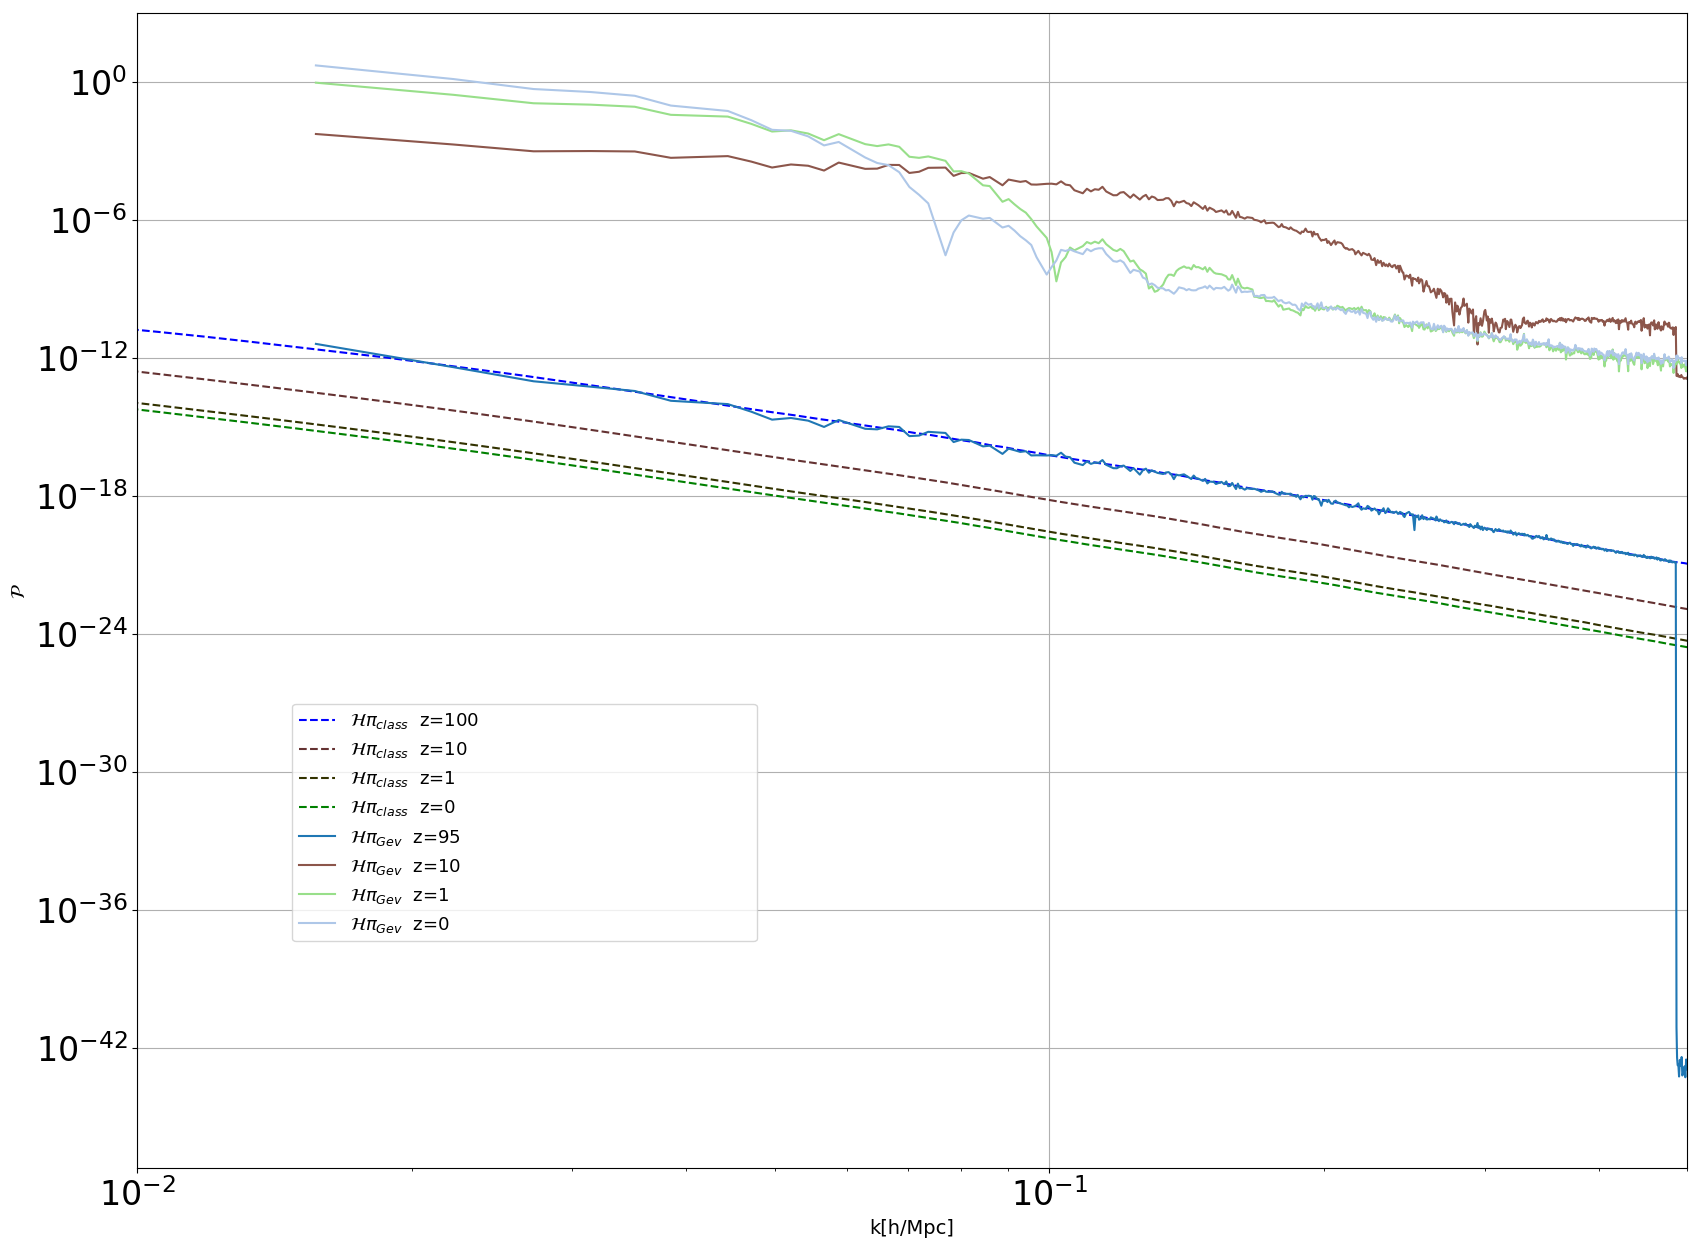

In [21]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(class_newt_z100)[0],8))
Class_power_z10=np.zeros((np.shape(class_newt_z10)[0],8))
Class_power_z1=np.zeros((np.shape(class_newt_z1)[0],8))
Class_power_z0=np.zeros((np.shape(class_newt_z0)[0],8))
for i in range(1,8):
    Class_power_z100[:,i]=As*(class_newt_z100[:,i]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
    Class_power_z10[:,i]=As*(class_newt_z10[:,i]**2)*((class_newt_z10[:,0]/kp)**(ns-1.));
    Class_power_z1[:,i]=As*(class_newt_z1[:,i]**2)*((class_newt_z1[:,0]/kp)**(ns-1.));
    Class_power_z0[:,i]=As*(class_newt_z0[:,i]**2)*((class_newt_z0[:,0]/kp)**(ns-1.));

# delta_kess=As*((Class[:,2]-Class[:,5])**2)*((Class[:,0]/kp)**(ns-1.));

#Plot setting


plt.figure(figsize=(20,15))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#################################
#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
# plt.subplot(221)
plt.loglog(class_newt_z100[:,0], (H_conf_class_z100)**2*Class_power_z100[:,1],color="blue",linestyle='dashed',lw=1.5,label=r"${\mathcal{H}\pi_{class}}$  z=100 ")
plt.loglog(class_newt_z10[:,0], (H_conf_class_z10)**2*Class_power_z10[:,1],color=tableau12[8],linestyle='dashed',lw=1.5,label=r"${\mathcal{H}\pi_{class}}$  z=10 ")
plt.loglog(class_newt_z1[:,0], (H_conf_class_z1)**2*Class_power_z1[:,1],color=tableau12[5],linestyle='dashed',lw=1.5,label=r"${\mathcal{H}\pi_{class}}$  z=1 ")
plt.loglog(class_newt_z0[:,0], (H_conf_class_z0)**2*Class_power_z0[:,1],color="green",linestyle='dashed',lw=1.5,label=r"${\mathcal{H}\pi_{class}}$  z=0 ")

plt.loglog(piGev_z_100[:,0],piGev_z_100[:,1],color=tableau20[0],linestyle='solid',lw=1.5,label=r"$\mathcal{H} \pi_{Gev}$  z=95 ")
plt.loglog(piGev_z_10[:,0],piGev_z_10[:,1],color=tableau20[10],linestyle='solid',lw=1.5,label=r"$\mathcal{H} \pi_{Gev}$  z=10 ")
plt.loglog(piGev_z_1[:,0],piGev_z_1[:,1],color=tableau20[5],linestyle='solid',lw=1.5,label=r"$\mathcal{H} \pi_{Gev}$  z=1 ")
plt.loglog(piGev_z_0[:,0],piGev_z_0[:,1],color=tableau20[1],linestyle='solid',lw=1.5,label=r"$\mathcal{H} \pi_{Gev}$  z=0 ")


plt.legend(bbox_to_anchor=(0.1, 0.30, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}$",fontsize=14)
plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-15,1.e-7)
plt.grid(True)

plt.show()

# pi' Gev-Class

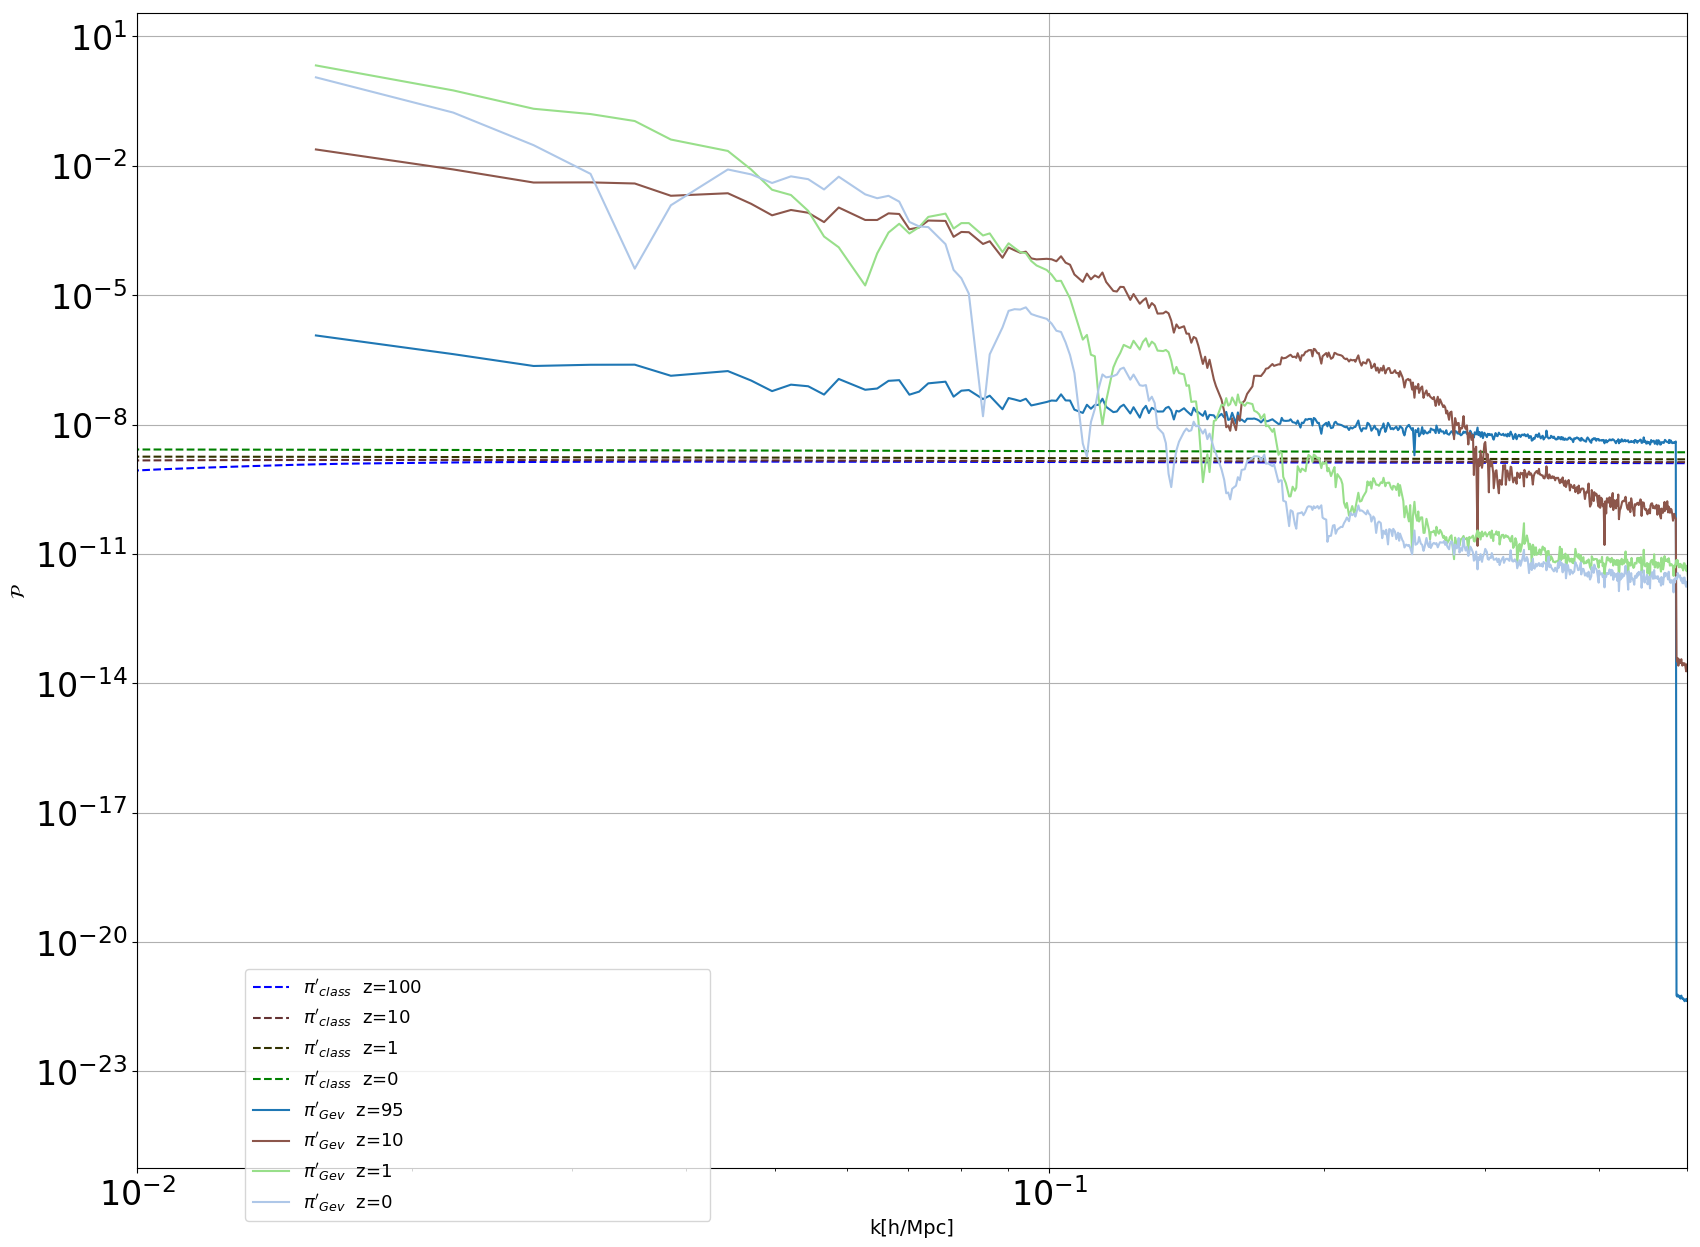

In [22]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(class_newt_z100)[0],8))
Class_power_z10=np.zeros((np.shape(class_newt_z10)[0],8))
Class_power_z1=np.zeros((np.shape(class_newt_z1)[0],8))
Class_power_z0=np.zeros((np.shape(class_newt_z0)[0],8))
for i in range(1,8):
    Class_power_z100[:,i]=As*(class_newt_z100[:,i]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
    Class_power_z10[:,i]=As*(class_newt_z10[:,i]**2)*((class_newt_z10[:,0]/kp)**(ns-1.));
    Class_power_z1[:,i]=As*(class_newt_z1[:,i]**2)*((class_newt_z1[:,0]/kp)**(ns-1.));
    Class_power_z0[:,i]=As*(class_newt_z0[:,i]**2)*((class_newt_z0[:,0]/kp)**(ns-1.));

# delta_kess=As*((Class[:,2]-Class[:,5])**2)*((Class[:,0]/kp)**(ns-1.));

#Plot setting


plt.figure(figsize=(20,15))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#################################
#SubplotI Check the pi in class and Gevolution
# Hconf*pi comparison
# plt.subplot(221)
plt.loglog(class_newt_z100[:,0], Class_power_z100[:,2],color="blue",linestyle='dashed',lw=1.5,label=r"${\pi'_{class}}$  z=100 ")
plt.loglog(class_newt_z10[:,0], Class_power_z10[:,2],color=tableau12[8],linestyle='dashed',lw=1.5,label=r"${\pi'_{class}}$  z=10 ")
plt.loglog(class_newt_z1[:,0], Class_power_z1[:,2],color=tableau12[5],linestyle='dashed',lw=1.5,label=r"${\pi'_{class}}$  z=1 ")
plt.loglog(class_newt_z0[:,0], Class_power_z0[:,2],color="green",linestyle='dashed',lw=1.5,label=r"${\pi'_{class}}$  z=0 ")

plt.loglog(piGev_v_z_100[:,0],piGev_v_z_100[:,1],color=tableau20[0],linestyle='solid',lw=1.5,label=r"$ \pi'_{Gev}$  z=95 ")
plt.loglog(piGev_v_z_10[:,0],piGev_v_z_10[:,1],color=tableau20[10],linestyle='solid',lw=1.5,label=r"$ \pi'_{Gev}$  z=10 ")
plt.loglog(piGev_v_z_1[:,0],piGev_v_z_1[:,1],color=tableau20[5],linestyle='solid',lw=1.5,label=r"$ \pi'_{Gev}$  z=1 ")
plt.loglog(piGev_v_z_0[:,0],piGev_v_z_0[:,1],color=tableau20[1],linestyle='solid',lw=1.5,label=r"$ \pi'_{Gev}$  z=0 ")


plt.legend(bbox_to_anchor=(0.07, 0.07, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}$",fontsize=14)
plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-15,1.e-7)
plt.grid(True)

plt.show()

# delta kess comparison

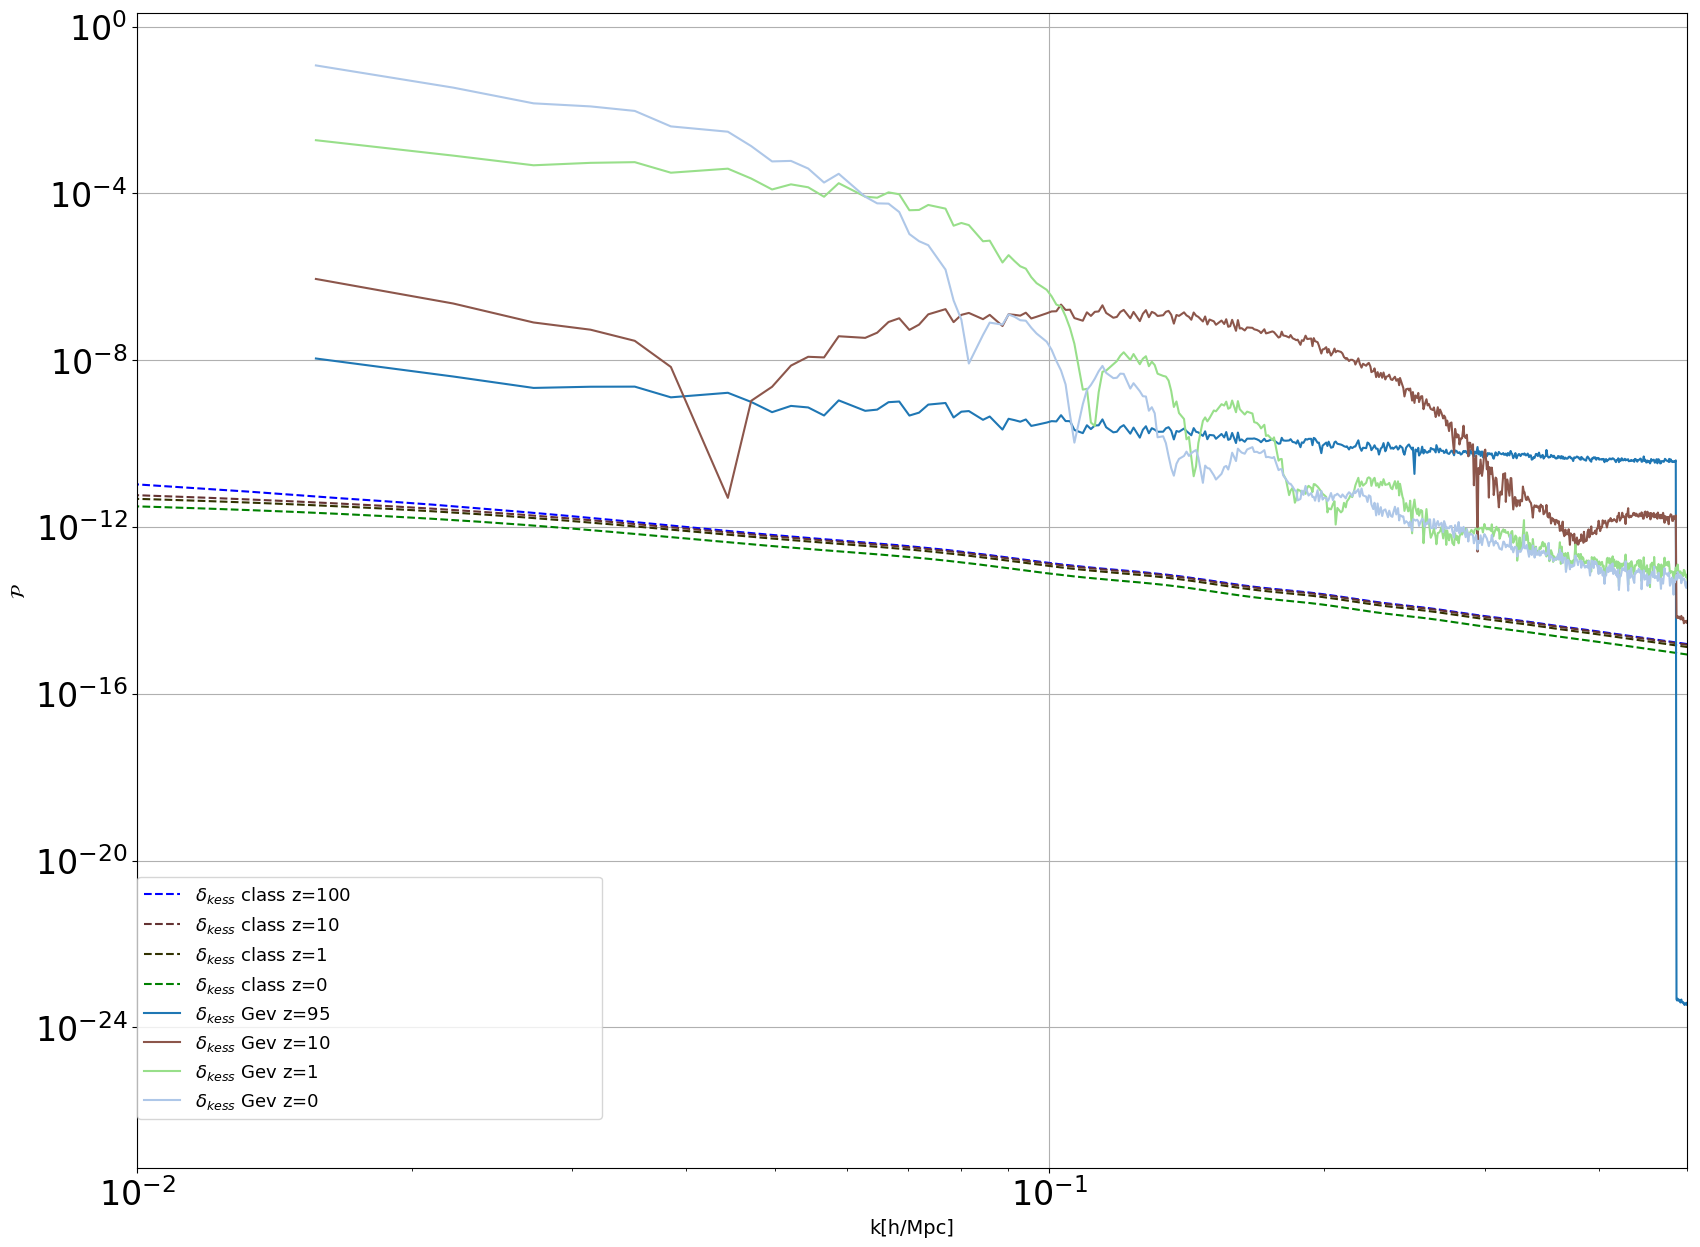

In [26]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
w=-0.9
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2_e3=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(class_newt_z100)[0],8))
Class_power_z10=np.zeros((np.shape(class_newt_z10)[0],8))
Class_power_z1=np.zeros((np.shape(class_newt_z1)[0],8))
Class_power_z0=np.zeros((np.shape(class_newt_z0)[0],8))
for i in range(1,8):
    Class_power_z100[:,i]=As*(class_newt_z100[:,i]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
    Class_power_z10[:,i]=As*(class_newt_z10[:,i]**2)*((class_newt_z10[:,0]/kp)**(ns-1.));
    Class_power_z1[:,i]=As*(class_newt_z1[:,i]**2)*((class_newt_z1[:,0]/kp)**(ns-1.));
    Class_power_z0[:,i]=As*(class_newt_z0[:,i]**2)*((class_newt_z0[:,0]/kp)**(ns-1.));

#Class delta making
Class_delta_I=((1.+w)/cs2_e3)*((1.-3.*cs2_e3)*Hubble_conf_Mpc(1./(1.+100.))*class_newt_z100[:,1])
Class_delta_II=((1.+w)/cs2_e3)*(-class_newt_z100[:,5])
Class_delta_III=((1.+w)/cs2_e3)*(+class_newt_z100[:,2])
Class_deltakess_z100=Class_delta_I+Class_delta_II+Class_delta_III
Class_delta_pow=As*(Class_deltakess_z100[:]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));


#Plot setting
plt.figure(figsize=(20,15))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
# pi_class_cs_e3_newt=(class_z_all[0][:,4]/((class_z_all[0][:,0]*h)**2) );
# pi_prime_class_cs_e3_newt_zlist=(cs2_e3*class_z_all[0][:,3]/(1.+w) +H_conf_class_z100*class_newt_z100[:,1]*(3.*cs2_e3-1.) + class_z_all[0][:,5]) ;

#################################
plt.loglog(class_newt_z100[:,0],Class_power_z100[:,3] ,color="blue",linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=100 ")

plt.loglog(class_newt_z10[:,0], Class_power_z10[:,3],color=tableau12[8],linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=10 ")
plt.loglog(class_newt_z1[:,0], Class_power_z1[:,3],color=tableau12[5],linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=1 ")
plt.loglog(class_newt_z0[:,0], Class_power_z0[:,3],color="green",linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=0 ")
#Class test:
# plt.loglog(class_newt_z0[:,0], Class_delta_pow,color="red",linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class_test z=100 ")

plt.loglog(delta_Gev_kess_z100[:,0],delta_Gev_kess_z100[:,1],color=tableau20[0],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=95 ")
plt.loglog(delta_Gev_kess_z10[:,0],delta_Gev_kess_z10[:,1],color=tableau20[10],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=10 ")
plt.loglog(delta_Gev_kess_z1[:,0],delta_Gev_kess_z1[:,1],color=tableau20[5],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=1 ")
plt.loglog(delta_Gev_kess_z0[:,0],delta_Gev_kess_z0[:,1],color=tableau20[1],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=0 ")


plt.legend(bbox_to_anchor=(0.0, 0.15, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}$",fontsize=14)
plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-15,1.e-7)
plt.grid(True)

plt.show()

# delta matter comparison

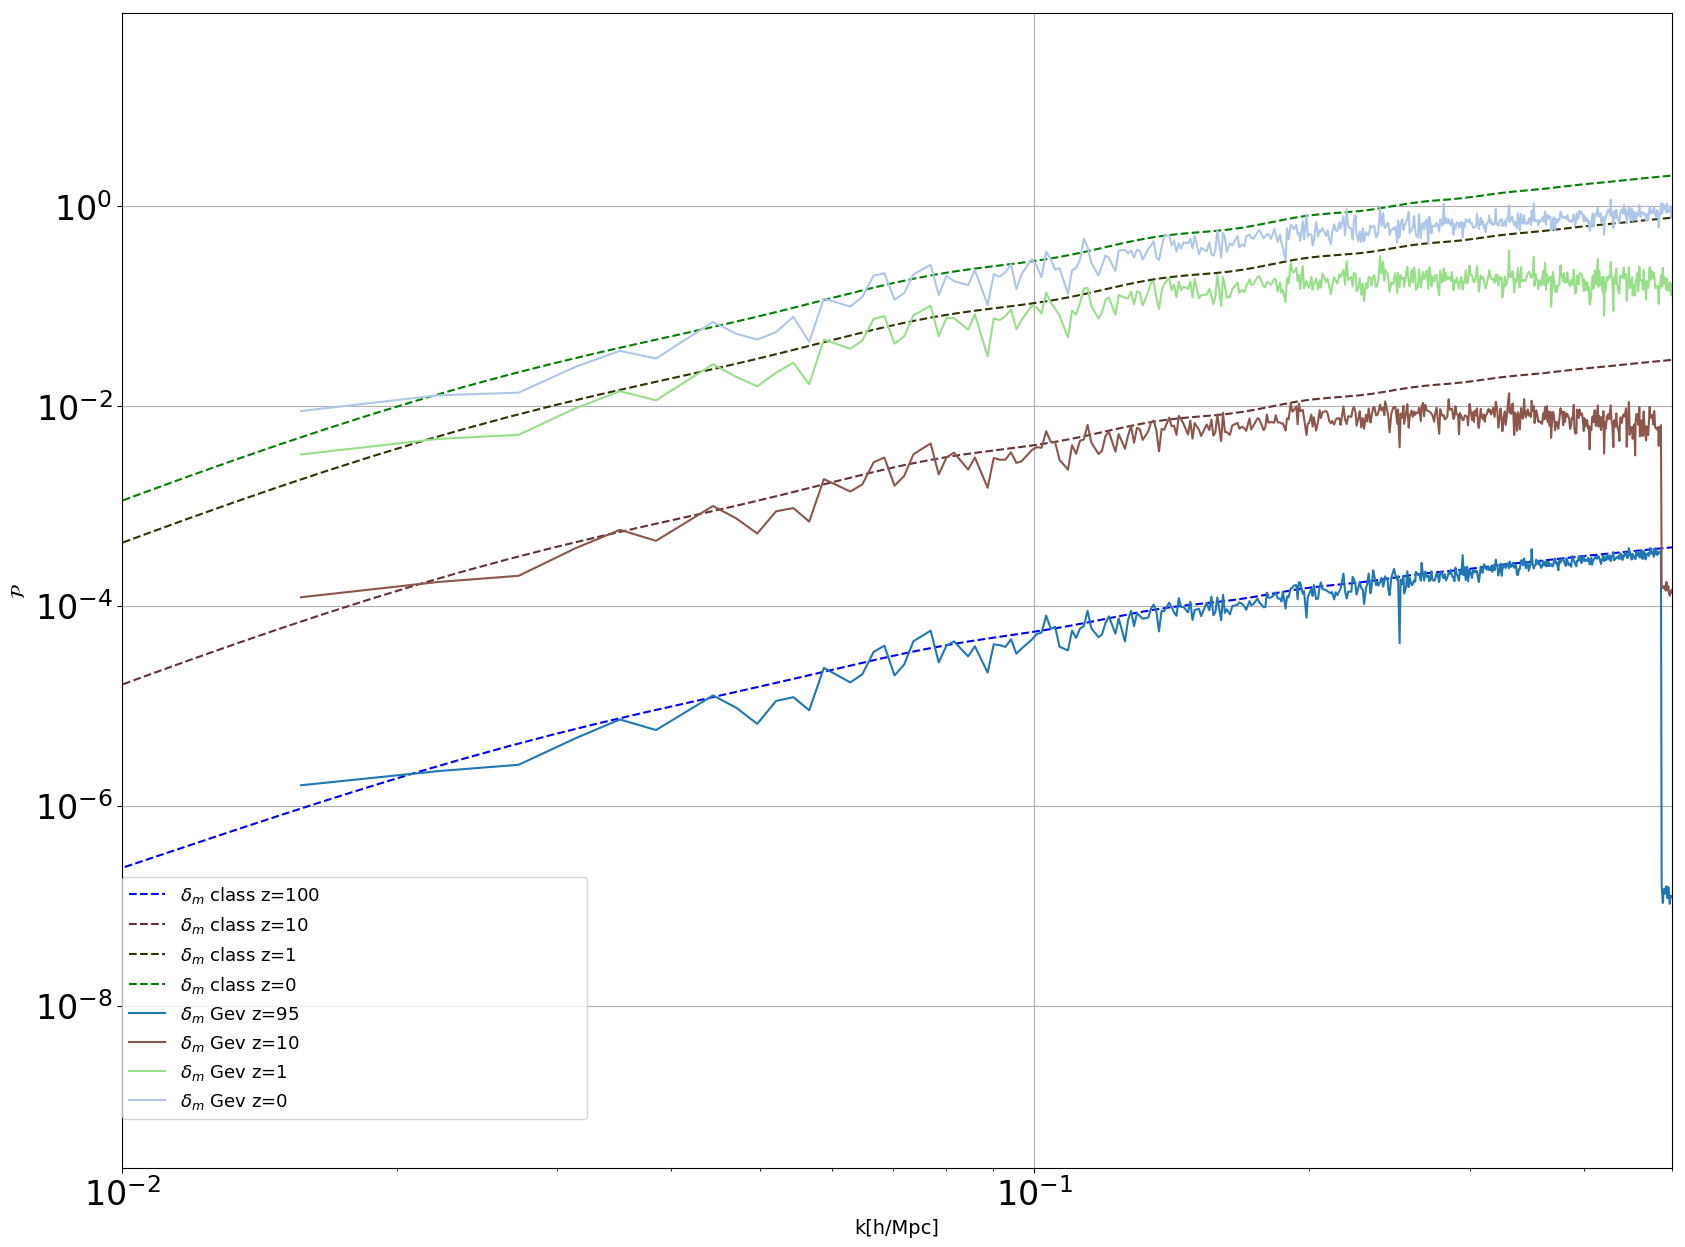

In [25]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(class_newt_z100)[0],8))
Class_power_z10=np.zeros((np.shape(class_newt_z10)[0],8))
Class_power_z1=np.zeros((np.shape(class_newt_z1)[0],8))
Class_power_z0=np.zeros((np.shape(class_newt_z0)[0],8))
for i in range(1,8):
    Class_power_z100[:,i]=As*(class_newt_z100[:,i]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
    Class_power_z10[:,i]=As*(class_newt_z10[:,i]**2)*((class_newt_z10[:,0]/kp)**(ns-1.));
    Class_power_z1[:,i]=As*(class_newt_z1[:,i]**2)*((class_newt_z1[:,0]/kp)**(ns-1.));
    Class_power_z0[:,i]=As*(class_newt_z0[:,i]**2)*((class_newt_z0[:,0]/kp)**(ns-1.));

# delta_kess=As*((Class[:,2]-Class[:,5])**2)*((Class[:,0]/kp)**(ns-1.));

#Plot setting


plt.figure(figsize=(20,15))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#################################
plt.loglog(class_newt_z100[:,0], Class_power_z100[:,6],color="blue",linestyle='dashed',lw=1.5,label=r"${\delta_{m}}$ class z=100 ")
plt.loglog(class_newt_z10[:,0], Class_power_z10[:,6],color=tableau12[8],linestyle='dashed',lw=1.5,label=r"${\delta_{m}}$ class z=10 ")
plt.loglog(class_newt_z1[:,0], Class_power_z1[:,6],color=tableau12[5],linestyle='dashed',lw=1.5,label=r"${\delta_{m}}$ class z=1 ")
plt.loglog(class_newt_z0[:,0], Class_power_z0[:,6],color="green",linestyle='dashed',lw=1.5,label=r"${\delta_{m}}$ class z=0 ")

plt.loglog(delta_Gev_m_z100[:,0],delta_Gev_m_z100[:,1],color=tableau20[0],linestyle='solid',lw=1.5,label=r"$ \delta_{m}$ Gev z=95 ")
plt.loglog(delta_Gev_m_z10[:,0],delta_Gev_m_z10[:,1],color=tableau20[10],linestyle='solid',lw=1.5,label=r"$ \delta_{m}$ Gev z=10 ")
plt.loglog(delta_Gev_m_z1[:,0],delta_Gev_m_z1[:,1],color=tableau20[5],linestyle='solid',lw=1.5,label=r"$ \delta_{m}$ Gev z=1 ")
plt.loglog(delta_Gev_m_z0[:,0],delta_Gev_m_z0[:,1],color=tableau20[1],linestyle='solid',lw=1.5,label=r"$ \delta_{m}$ Gev z=0 ")


plt.legend(bbox_to_anchor=(0.0, 0.15, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}$",fontsize=14)
plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-15,1.e-7)
plt.grid(True)

plt.show()

# Phi comparison

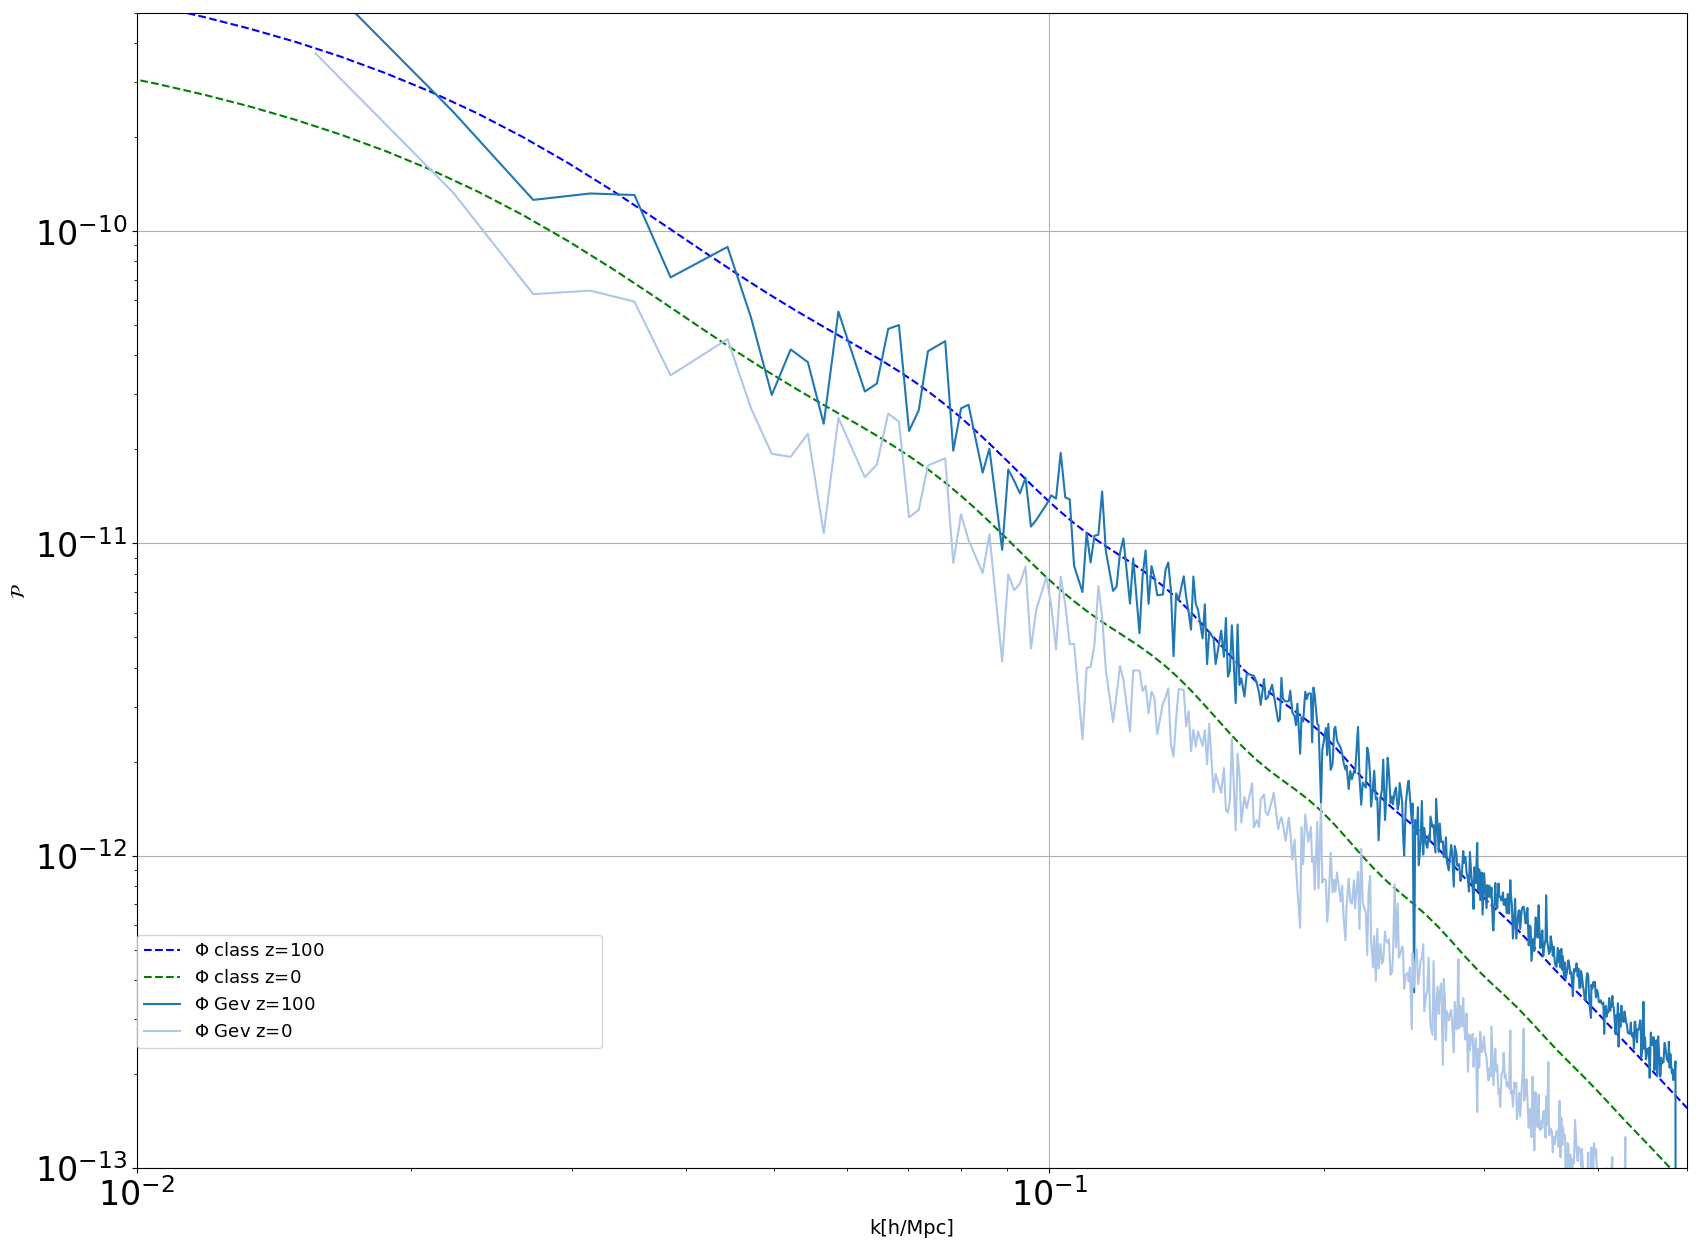

In [27]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(class_newt_z100)[0],8))
Class_power_z10=np.zeros((np.shape(class_newt_z10)[0],8))
Class_power_z1=np.zeros((np.shape(class_newt_z1)[0],8))
Class_power_z0=np.zeros((np.shape(class_newt_z0)[0],8))
for i in range(1,8):
    Class_power_z100[:,i]=As*(class_newt_z100[:,i]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
    Class_power_z10[:,i]=As*(class_newt_z10[:,i]**2)*((class_newt_z10[:,0]/kp)**(ns-1.));
    Class_power_z1[:,i]=As*(class_newt_z1[:,i]**2)*((class_newt_z1[:,0]/kp)**(ns-1.));
    Class_power_z0[:,i]=As*(class_newt_z0[:,i]**2)*((class_newt_z0[:,0]/kp)**(ns-1.));

# delta_kess=As*((Class[:,2]-Class[:,5])**2)*((Class[:,0]/kp)**(ns-1.));

#Plot setting


plt.figure(figsize=(20,15))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#################################
plt.loglog(class_newt_z100[:,0], Class_power_z100[:,5],color="blue",linestyle='dashed',lw=1.5,label=r"$\Phi$ class z=100 ")
# plt.loglog(class_newt_z10[:,0], Class_power_z10[:,5],color=tableau12[8],linestyle='dashed',lw=1.5,label=r"$\Phi$ class z=10 ")
# plt.loglog(class_newt_z1[:,0], Class_power_z1[:,5],color=tableau12[5],linestyle='dashed',lw=1.5,label=r"$\Phi$ class z=1 ")
plt.loglog(class_newt_z0[:,0], Class_power_z0[:,5],color="green",linestyle='dashed',lw=1.5,label=r"$\Phi$ class z=0 ")

plt.loglog(phi_gev_z100[:,0],phi_gev_z100[:,1],color=tableau20[0],linestyle='solid',lw=1.5,label=r"$ \Phi$ Gev z=100 ")
# plt.loglog(phi_gev_z10[:,0],phi_gev_z10[:,1],color=tableau20[10],linestyle='solid',lw=1.5,label=r"$ \Phi$ Gev z=10 ")
# plt.loglog(phi_gev_z1[:,0],phi_gev_z1[:,1],color=tableau20[5],linestyle='solid',lw=1.5,label=r"$ \Phi$ Gev z=1 ")
plt.loglog(phi_gev_z0[:,0],phi_gev_z0[:,1],color=tableau20[1],linestyle='solid',lw=1.5,label=r"$ \Phi$ Gev z=0 ")


plt.legend(bbox_to_anchor=(0.0, 0.10, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}$",fontsize=14)
plt.xlim(0.01,5.e-1)
plt.ylim(1.e-13,5.e-10)
plt.grid(True)

plt.show()

# Single redshift test, When phi is realized from class!!

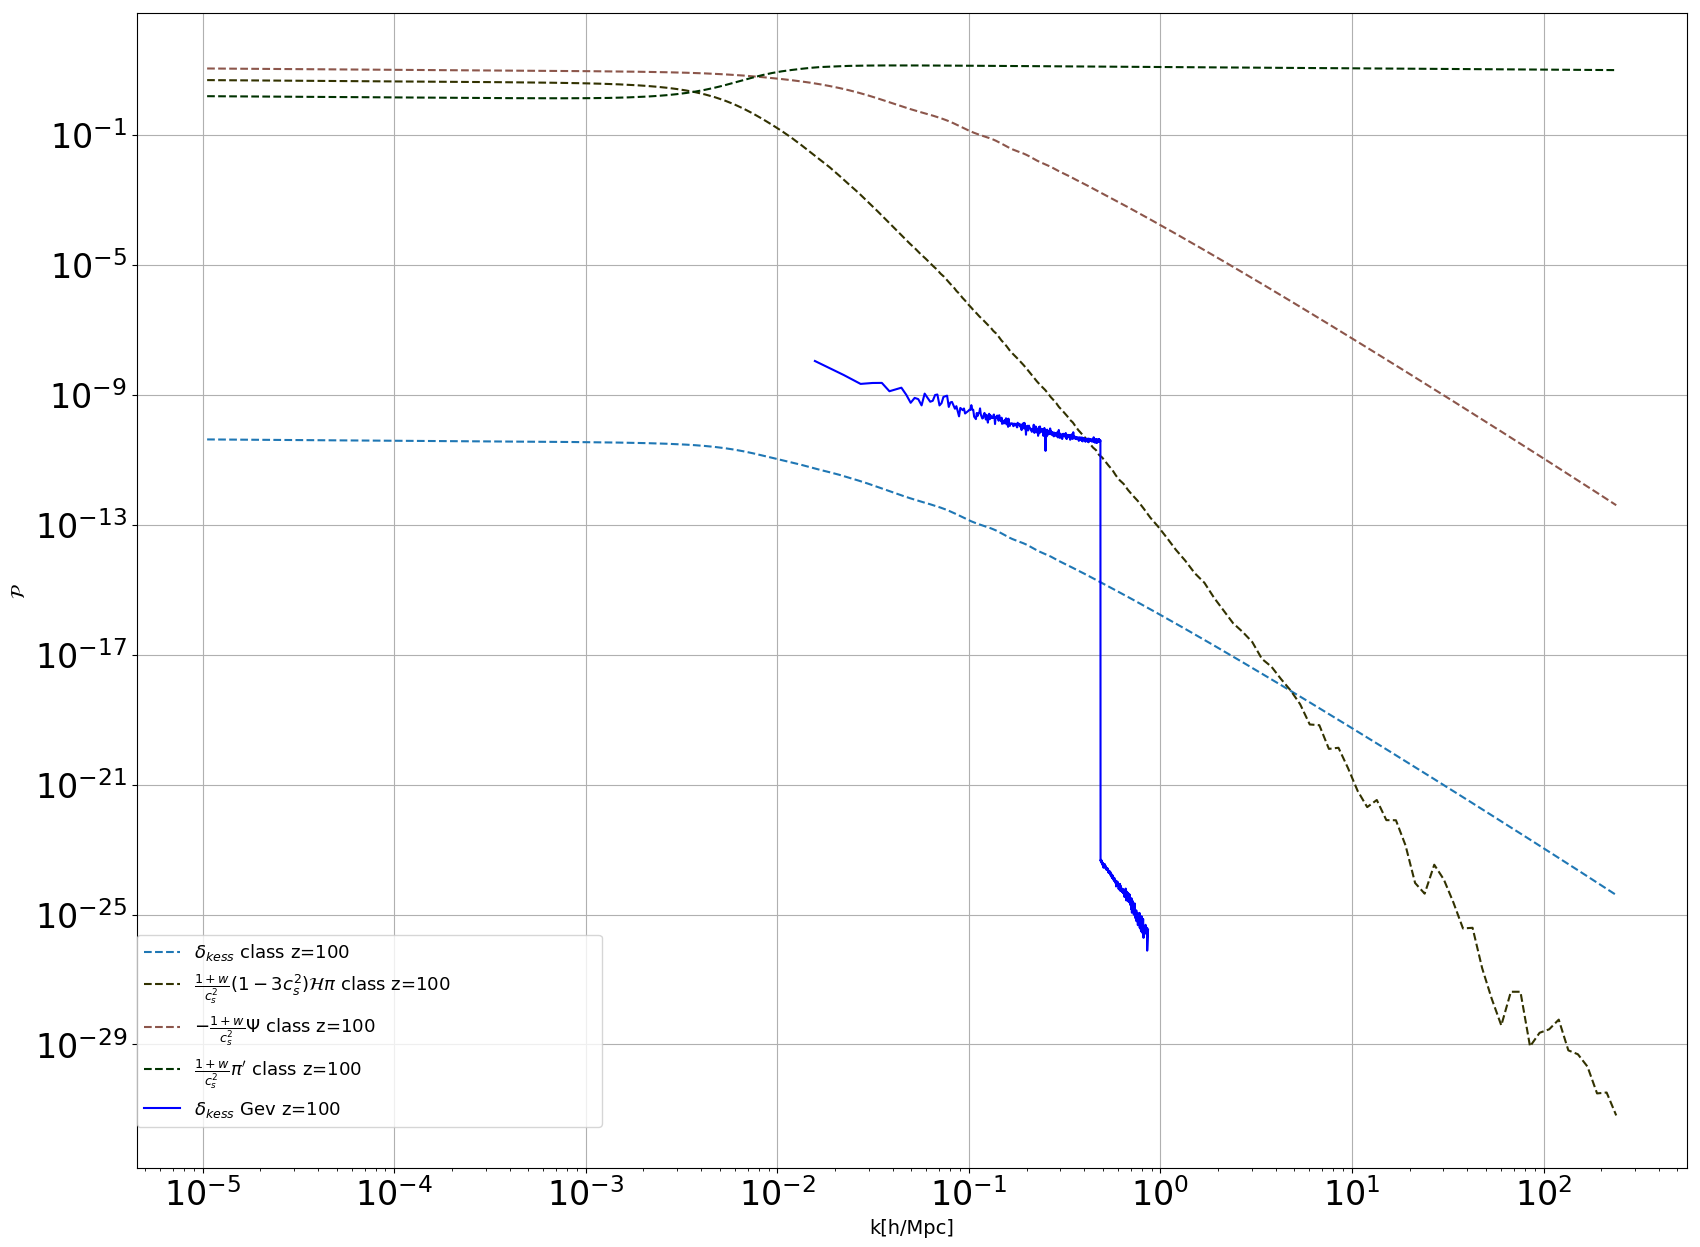

In [28]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c=2997.; #[100km/s]
HGev=np.sqrt(Boxsize**2/c**2) #0.10677, H0 Gevolution in code's unit
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
#################################
#Class Hubble factor, H in unit 1/Mpc!
# It is phsyical hubble, to make it conformal need to multiply to a. Hconf = H_phys * a
H_conf_class_z100=Hubble_conf_Mpc(1./(1.+100.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z10=Hubble_conf_Mpc(1./(1.+10.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z1=Hubble_conf_Mpc(1./(1.+1.)); # Unit=1/Mpc Hconf=a*H
H_conf_class_z0=Hubble_conf_Mpc(1./(1.+0.)); # Unit=1/Mpc Hconf=a*H
#################################
# Parameters for converting to dimensionless power.
As=2.19*10**-9;
w=-0.9
h=0.67556
kp=0.05/h; 
ns=0.96;
cs2_e3=1.e-6;
#################################
#Making power of class field to compare with Gev
Class_power_z100=np.zeros((np.shape(class_newt_z100)[0],8))
Class_power_z10=np.zeros((np.shape(class_newt_z10)[0],8))
Class_power_z1=np.zeros((np.shape(class_newt_z1)[0],8))
Class_power_z0=np.zeros((np.shape(class_newt_z0)[0],8))
for i in range(1,8):
    Class_power_z100[:,i]=As*(class_newt_z100[:,i]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
    Class_power_z10[:,i]=As*(class_newt_z10[:,i]**2)*((class_newt_z10[:,0]/kp)**(ns-1.));
    Class_power_z1[:,i]=As*(class_newt_z1[:,i]**2)*((class_newt_z1[:,0]/kp)**(ns-1.));
    Class_power_z0[:,i]=As*(class_newt_z0[:,i]**2)*((class_newt_z0[:,0]/kp)**(ns-1.));

#Class delta making
Class_delta_I=((1.+w)/cs2_e3)*((1.-3.*cs2_e3)*Hubble_conf_Mpc(1./(1.+100.))*class_newt_z100[:,1])
Class_delta_II=((1.+w)/cs2_e3)*(-class_newt_z100[:,5])
Class_delta_III=((1.+w)/cs2_e3)*(+class_newt_z100[:,2])
Class_deltakess_z100=Class_delta_I+Class_delta_II+Class_delta_III

Class_delta_I=As*(Class_delta_I[:]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
Class_delta_II=As*(Class_delta_II[:]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
Class_delta_III=As*(Class_delta_III[:]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));
Class_delta_tot_=As*(Class_deltakess_z100[:]**2)*((class_newt_z100[:,0]/kp)**(ns-1.));


#Plot setting
plt.figure(figsize=(20,15))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)
# pi_class_cs_e3_newt=(class_z_all[0][:,4]/((class_z_all[0][:,0]*h)**2) );
# pi_prime_class_cs_e3_newt_zlist=(cs2_e3*class_z_all[0][:,3]/(1.+w) +H_conf_class_z100*class_newt_z100[:,1]*(3.*cs2_e3-1.) + class_z_all[0][:,5]) ;

#################################
plt.loglog(class_newt_z100[:,0],Class_power_z100[:,3] ,color=tableau20[0],linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=100 ")
plt.loglog(class_newt_z100[:,0],Class_delta_I[:] ,color=tableau12[5],linestyle='dashed',lw=1.5,label=r"${\frac{1+w}{c_s^2}(1-3c_s^2)\mathcal{H} \pi}$ class z=100 ")
plt.loglog(class_newt_z100[:,0],Class_delta_II[:] ,color=tableau20[10],linestyle='dashed',lw=1.5,label=r"${-\frac{1+w}{c_s^2} \Psi}$ class z=100 ")
plt.loglog(class_newt_z100[:,0],Class_delta_III[:] ,color=tableau12[2],linestyle='dashed',lw=1.5,label=r"${\frac{1+w}{c_s^2} \pi'}$ class z=100 ")


# plt.loglog(class_newt_z10[:,0], Class_power_z10[:,3],color=tableau12[8],linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=10 ")
# plt.loglog(class_newt_z1[:,0], Class_power_z1[:,3],color=tableau12[5],linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=1 ")
# plt.loglog(class_newt_z0[:,0], Class_power_z0[:,3],color="green",linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class z=0 ")
#Class test:
# plt.loglog(class_newt_z0[:,0], Class_delta_pow,color="red",linestyle='dashed',lw=1.5,label=r"${\delta_{kess}}$ class_test z=100 ")

plt.loglog(delta_Gev_kess_z100[:,0],delta_Gev_kess_z100[:,1],color="blue",linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=100 ")
# plt.loglog(delta_Gev_kess_z10[:,0],delta_Gev_kess_z10[:,1],color=tableau20[10],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=10 ")
# plt.loglog(delta_Gev_kess_z1[:,0],delta_Gev_kess_z1[:,1],color=tableau20[5],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=1 ")
# plt.loglog(delta_Gev_kess_z0[:,0],delta_Gev_kess_z0[:,1],color=tableau20[1],linestyle='solid',lw=1.5,label=r"$ \delta_{kess}$ Gev z=0 ")


plt.legend(bbox_to_anchor=(0.0, 0.10, 0.3, .102), loc=1,ncol=1,fontsize=13, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=14)
plt.ylabel(r"$\mathcal{P}$",fontsize=14)
# plt.xlim(0.01,5.e-1)
# plt.ylim(1.e-15,1.e-7)
plt.grid(True)

plt.show()

# Background

('H0[1/Mpc]=100h/c: ', 0.00022593979933110373)


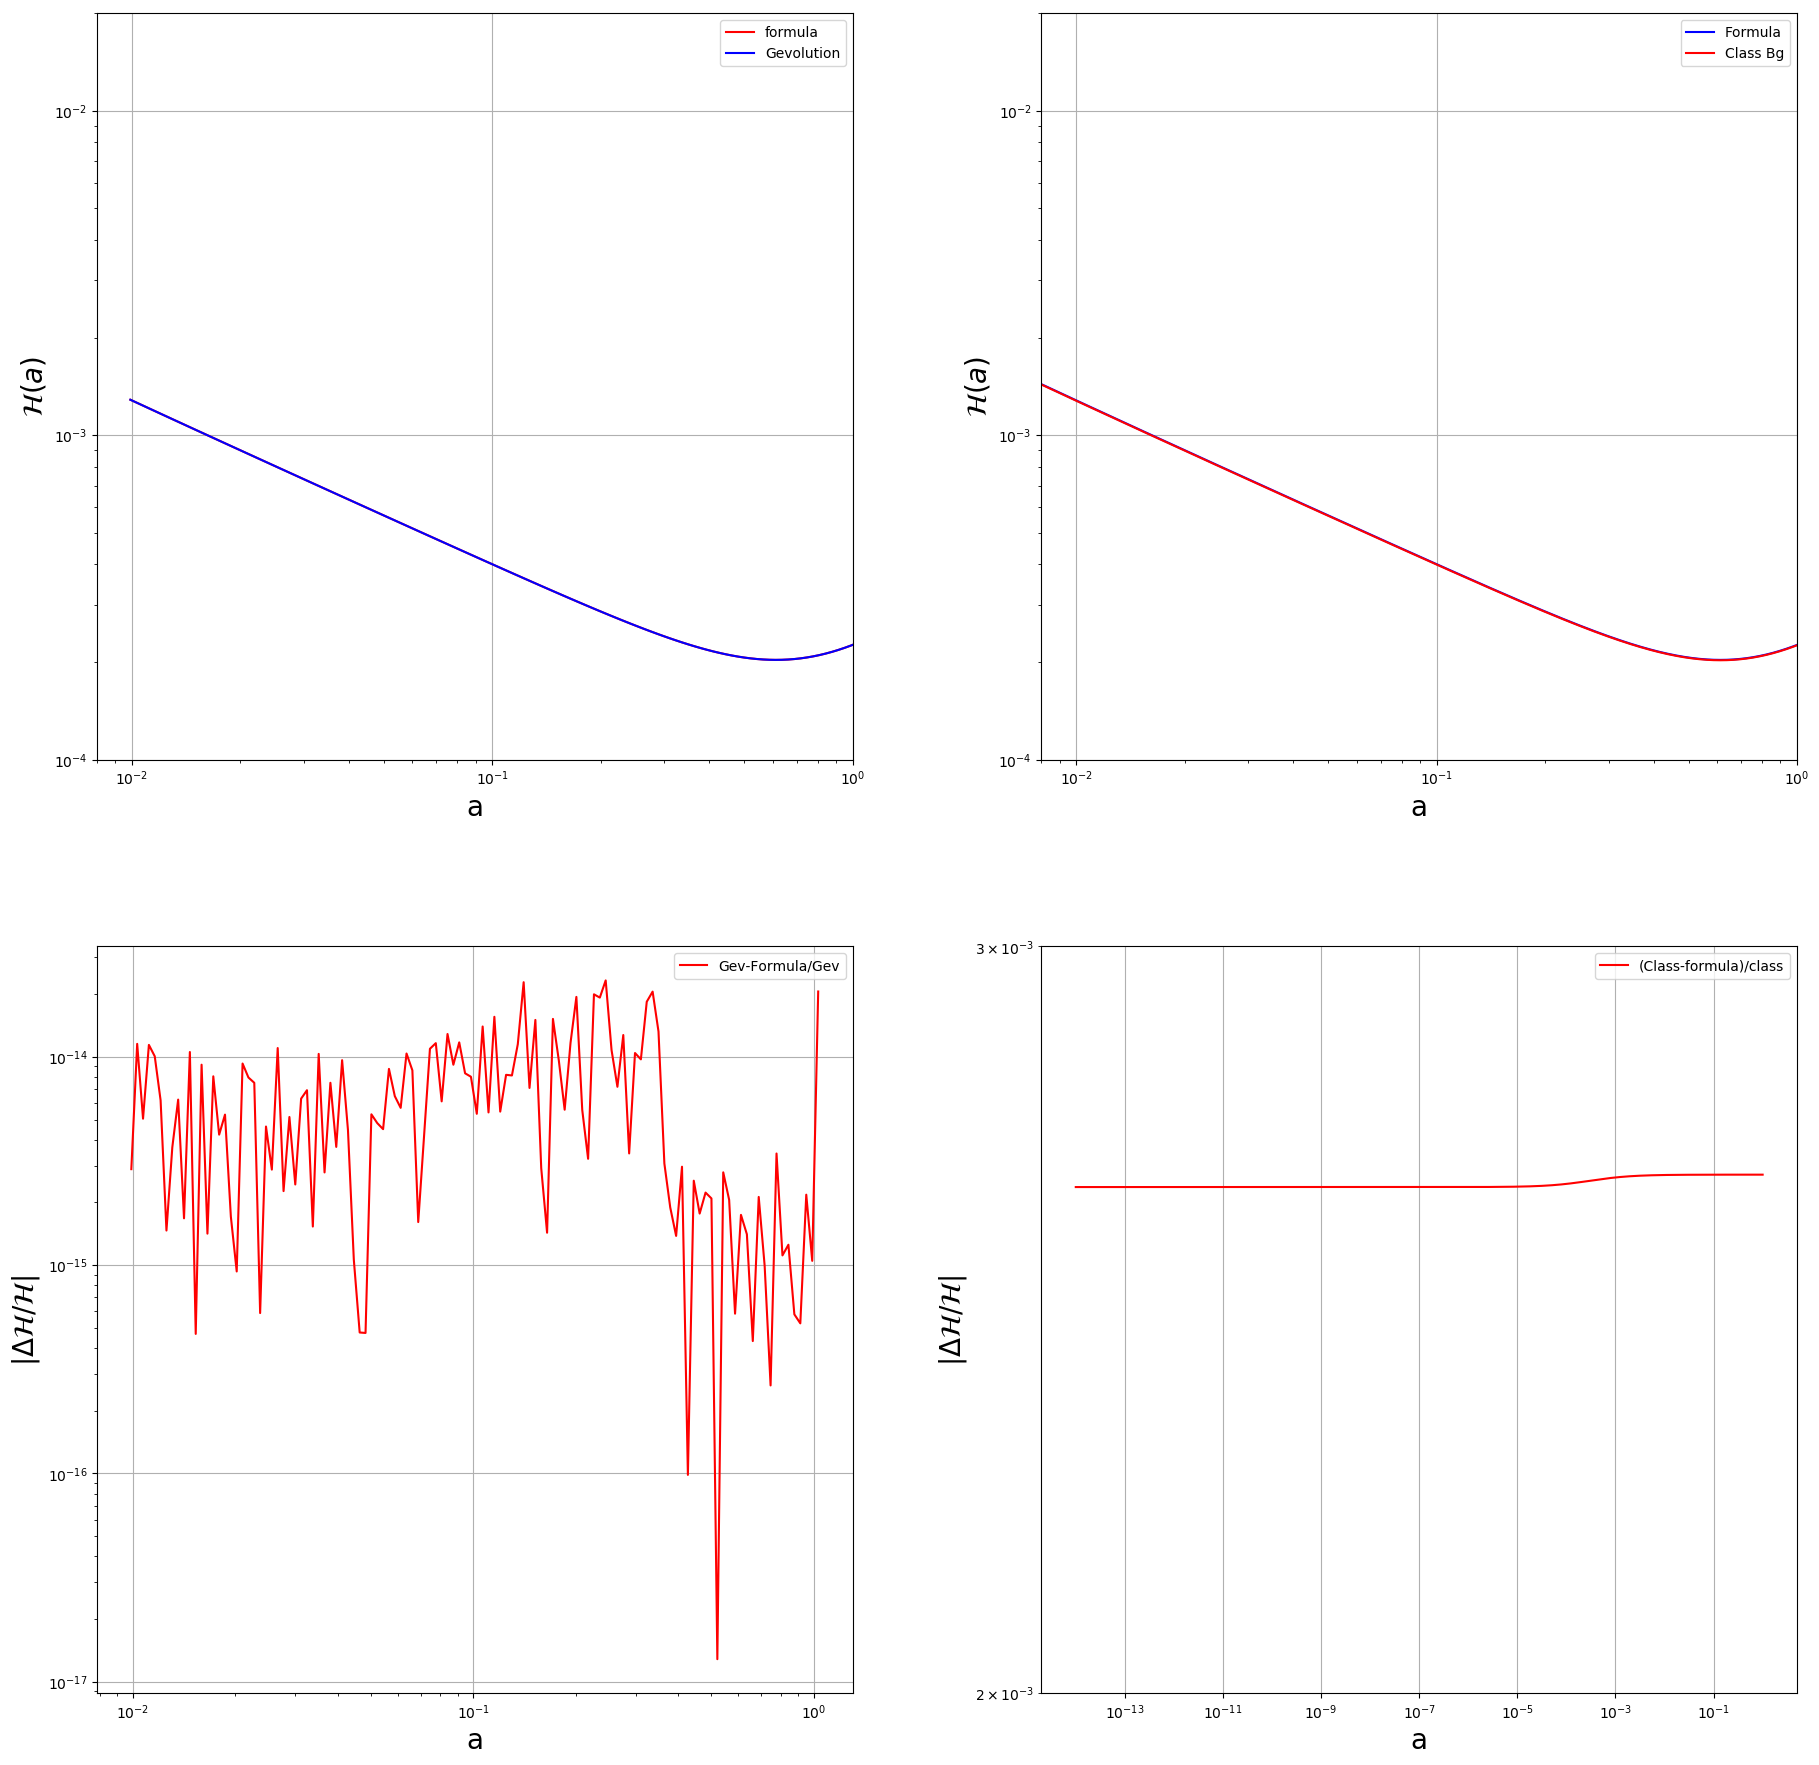

In [121]:
# params for makin power dimensionless
# H_0 in Gevilution unit.
h=0.67556
Boxsize=320.;
c_gev=2997.; #[100km/s]
c=2.99*1.e5; #Km/s
H0_conf_Gev=np.sqrt(Boxsize**2/c**2); #0.10677 rho_crit in Gev=1
H0=100*h/c; #H0 in 1/Mpc unit. 0.00022593979933110373
print("H0[1/Mpc]=100h/c: ",H0);
#################################
#Class Hubble_conformal factor, H in unit 1/Mpc!
# H in unit Mpc!
def Hubble_conf_Mpc(a):
    H0=0.00022593979933110373;w=-0.9;h=0.67556;
    Omega_b=0.022032/h/h; Omega_cdm=0.12038/h/h;
    Omega_m=Omega_b+Omega_cdm; Omega_Lambda=0.0;
    Omega_rad=9.16681e-05; Omega_kessence=1.-Omega_m-Omega_rad;
    return H0*np.sqrt(Omega_m*(a**-3)+Omega_rad*(a**-4)+Omega_Lambda+Omega_kessence*(a**(-3*(1+w))))*a
a=bg_Gevolution[:,2];
# Gevolution background output : H_conf/H0
# Plot settings
#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#*******************
#SubplotI
plt.figure(1)
plt.subplot(221)
plt.loglog(a,Hubble_conf_Mpc(a),color="red",label="formula")
plt.loglog(a,bg_Gevolution[:,3]*H0,color="blue",label="Gevolution")
plt.xlim(8e-3,1)
plt.ylim(1e-4,2e-2)
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=20)
plt.legend()
plt.grid(True)

#*******************
#SubplotII
# plt.figure(1)
# Class background is H_phys [1/Mpc] 3d column.
# H_conf= H_phys * a
# 0th comun is redshift.
plt.subplot(222)
a_class=1./(1.+Class_Bg_newt_cs_e3[:,0]);
plt.loglog(a_class,Hubble_conf_Mpc(a_class),color="blue",label="Formula")
plt.loglog(a_class,Class_Bg_newt_cs_e3[:,3]*a_class,color="red",label="Class Bg")
plt.xlim(8e-3,1)
plt.ylim(1e-4,2e-2)
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$\mathcal{H}(a)$",fontsize=20)
plt.legend()
plt.grid(True)

#*******************
#SubplotIII Difference plots
#Difference plot
plt.subplot(223)
a_class=1./(1.+Class_Bg_newt_cs_e3[:,0]);
plt.loglog(a,np.abs(bg_Gevolution[:,3]*H0-Hubble_conf_Mpc(a))/bg_Gevolution[:,3]*H0,color="red",label="Gev-Formula/Gev")
# plt.xlim(8e-3,1)
# plt.ylim(1e-4,2e-2)
plt.xlabel("a",fontsize=20)
plt.ylabel(r"$|\Delta \mathcal{H}/\mathcal{H}|$",fontsize=20)
plt.legend()
plt.grid(True)

#*******************
#SubplotIV 
plt.subplot(224)
a_class=1./(1.+Class_Bg_newt_cs_e3[:,0]);
plt.loglog(a_class,np.abs((Class_Bg_newt_cs_e3[:,3]*a_class-Hubble_conf_Mpc(a_class))/(Class_Bg_newt_cs_e3[:,3]*a_class)),color="red",label="(Class-formula)/class")
# plt.xlim(8e-3,1)
# plt.ylim(2e-3,3e-3)
plt.xlabel("a",fontsize=20)
plt.gca().set_ylim(2.e-3, 3.e-3)
plt.ylabel(r"$|\Delta \mathcal{H}/\mathcal{H}|$",fontsize=20)
plt.legend()
plt.grid(True)

# All subplots adjusting
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.25)
plt.show()

# Class Consistency checks!

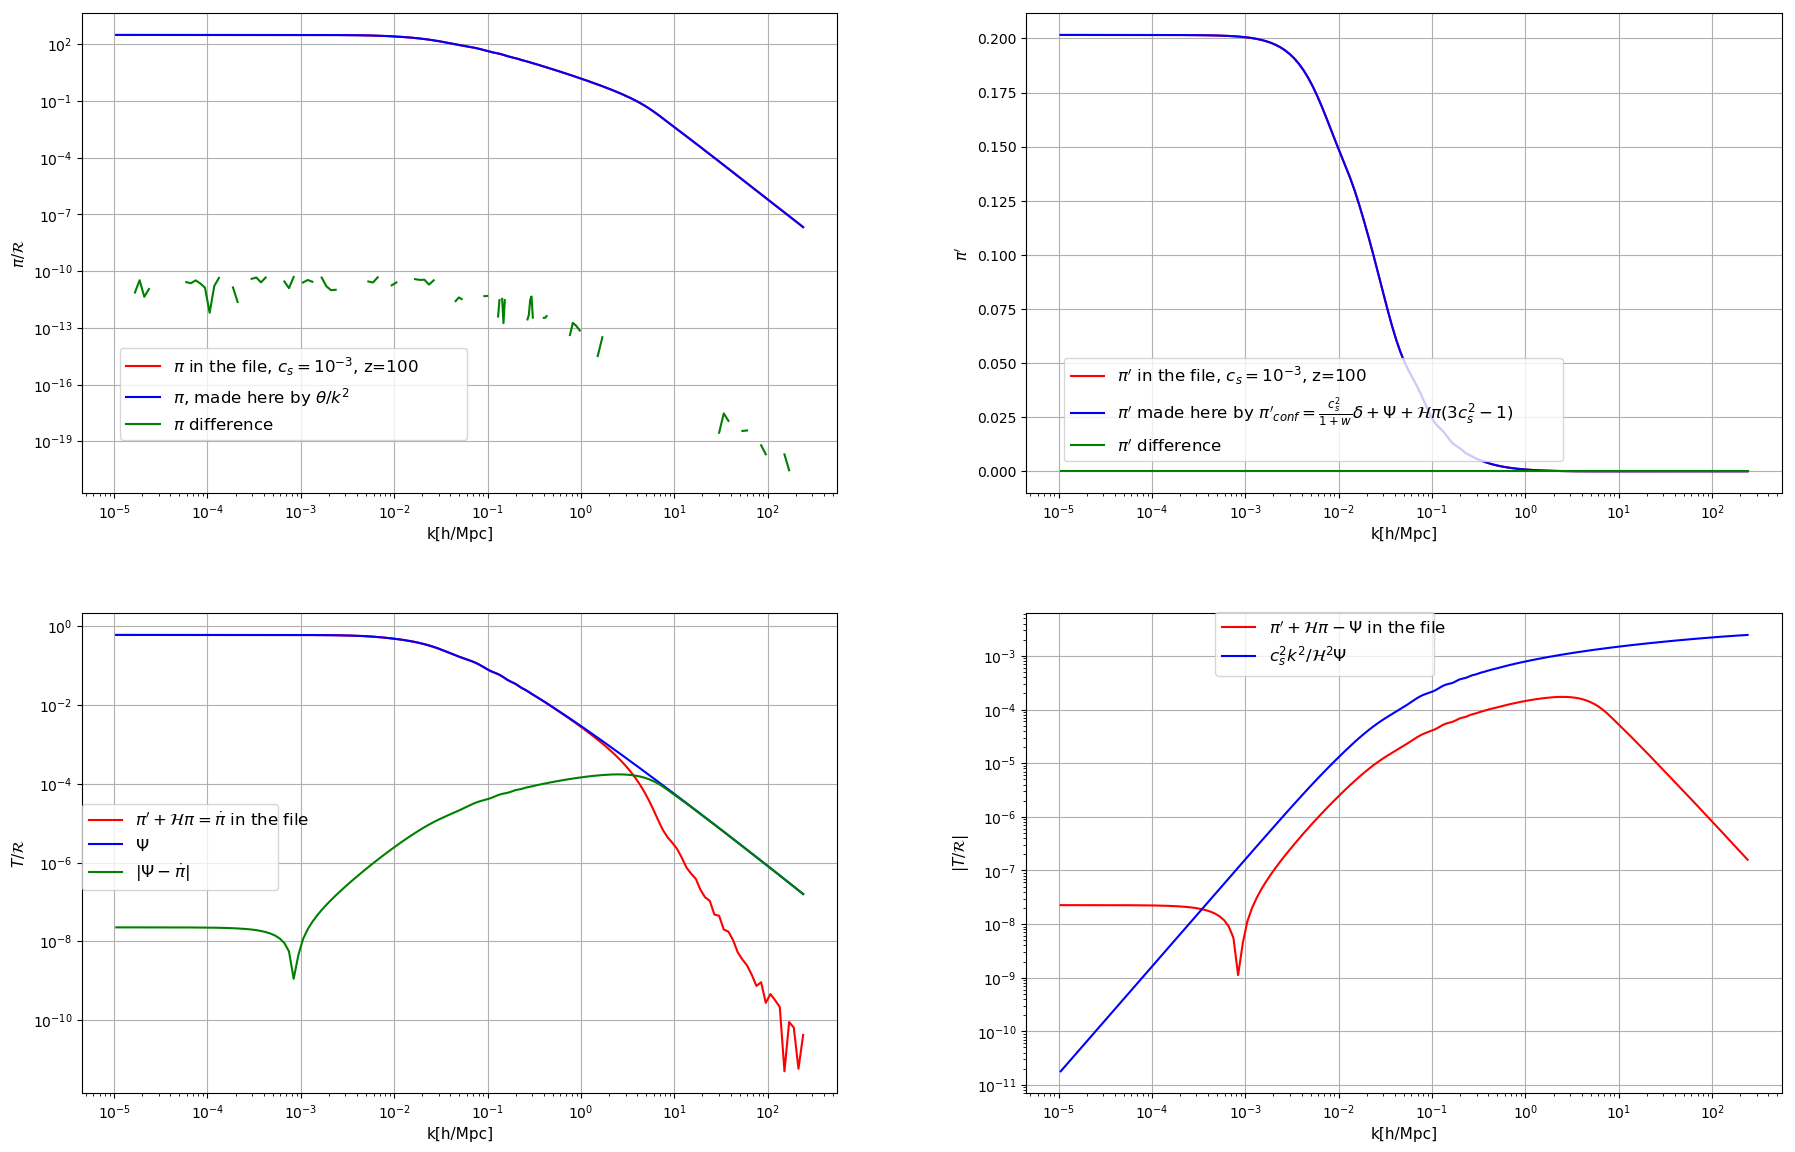

In [14]:
cs2_e3=1.e-6;
cs2_e1=1.e-2;
cs2_e0=1.e0;
w=-0.9;
h=0.67;
As=2.215*10.e-9;
ns=0.96;
kp=0.05/h;
H_confz_list=[Hubble_conf_Mpc(1./(1.+100.)),Hubble_conf_Mpc(1./(1.+10.)),Hubble_conf_Mpc(1./(1.+1.)),Hubble_conf_Mpc(1./(1.+0.))]; # Unit=1/Mpc Hconf=a*H
a_list=[1./(1.+100.),1./(1.+10.),1./(1.+1.),1./(1.+0.)];
z_list=[100,10,1,0]
# According to the formula it is different, maybe because different comsological parameters!
# pi' definition is so sensitive to the exact amount of Hconf_zini!!!
# \pi_conf in Newtonian in class : -(-\theta/k^2) pi here is conformal pi! and there is "-" from the definition of \theta!
#K=1/Mpc and theta itself is in Mpc-1 so pi is in Mpc unit! and the conversion.
i=0;
pi_class_cs_e3_newt=(class_z_all[i][:,4]/((class_z_all[i][:,0]*h)**2) );
#     pi_class_cs_e1_newt_zlist.append(class_cs_e1_newt[i][:,4]/((class_cs_e1_newt[i][:,0]*h)**2));
#     pi_class_cs_e0_newt_zlist.append(class_cs_e0_newt[i][:,4]/((class_cs_e0_newt[i][:,0]*h)**2));
#*********************************
#\pi_v in class
# Psi is Class_newt_z100[:,7] and delta=Class_newt_z100[:,4]
#pi'_conf in class according to the formula: delta_kess= (1+w/cs2)[-Psi + pi' + Hconf * pi (-3cs2 +1)]
pi_prime_class_cs_e3_newt_zlist=(cs2_e3*class_z_all[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e3_newt*(3.*cs2_e3-1.) + class_z_all[i][:,5]) ;
#     pi_prime_class_cs_e1_newt_zlist.append(cs2_e1*class_cs_e1_newt[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e1_newt_zlist[i]*(3.*cs2_e1-1.) + class_cs_e1_newt[i][:,5]) ;
#     pi_prime_class_cs_e0_newt_zlist.append(cs2_e0*class_cs_e0_newt[i][:,3]/(1.+w) + H_confz_list[i]*pi_class_cs_e0_newt_zlist[i]*(3.*cs2_e0-1.) + class_cs_e0_newt[i][:,5]) ;

#*********************************

# Some checks!
# We expect that \dot{\pi} + \Psi vanish! which we get \pi'+ H \pi -\Psi, cs=1.e-3;
pidot_zlist=(pi_prime_class_cs_e3_newt_zlist + H_confz_list[i] * pi_class_cs_e3_newt)
Psi_zlist=(class_z_all[i][:,5])
#*********************************

#Plot setting
plt.figure(figsize=(20,20))
ax = plt.gca()
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 16)

#*******************
#SubplotI Check that the pi and are made correctly with correct H-conf
#     plt.figure(1)
plt.subplot(321)
plt.loglog(class_z_all[i][:,0],class_z_all[i][:,1],color="red",label=r"$\pi$ in the file, $c_s=10^{-3}$, z="+str(z_list[i]))
plt.loglog(class_z_all[i][:,0],pi_class_cs_e3_newt[:],color="blue",label=r"$\pi$, made here by $\theta/k^2$")
plt.loglog(class_z_all[i][:,0],(pi_class_cs_e3_newt[:]-class_z_all[i][:,1]),color="green",label=r"$\pi$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.20, 0.46, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
# plt.yscale('log')
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi/\mathcal{R}$",fontsize=11)
# plt.xlim(0.0001,5)
plt.grid(True)

# #     #*******************
# #     #SubplotII Check that the pi' are made correctly with correct H-conf
plt.subplot(322)
plt.semilogx(class_z_all[i][:,0],class_z_all[i][:,2],color="red",label=r"$\pi'$ in the file, $c_s=10^{-3}$, z="+str(z_list[i]))
plt.semilogx(class_z_all[i][:,0],pi_prime_class_cs_e3_newt_zlist[:],color="blue",label=r"$\pi'$ made here by $\pi'_{conf}=\frac{c_s^2}{1+w}\delta + \Psi +\mathcal{H}\pi (3c_s^2-1)$")
plt.semilogx(class_z_all[i][:,0],(pi_prime_class_cs_e3_newt_zlist[:]-class_z_all[i][:,2]),color="green",label=r"$\pi'$ difference")
plt.legend(bbox_to_anchor=(0.05, 0.18, 0.66, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$\pi'$",fontsize=11)
plt.grid(True)

# #     #*******************
# #     #SubplotIII Check that the \dot{pi} and \Psi comparison
plt.subplot(323)
plt.loglog(class_z_all[i][:,0],pidot_zlist[:],color="red",label=r"$\pi'+ \mathcal{H} \pi =\dot{\pi}$ in the file")
plt.loglog(class_z_all[i][:,0],Psi_zlist[:],color="blue",label=r"$\Psi$")
plt.loglog(class_z_all[i][:,0],np.abs(pidot_zlist[:]-Psi_zlist[:]),color="green",label=r"$ |\Psi-\dot{\pi}|$")

plt.legend(bbox_to_anchor=(0.00, 0.50, 0.26, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$T/{\mathcal{R}}$",fontsize=11)
plt.grid(True)

# #     #*******************
# #     #SubplotIV Check that the pi' + Hconf \pi -psi = pi_dot  -Psi , is  comparable with cs2 k^2/H^2 \Psi!
# #     # For cs->0 these plots should be the same! (pi_dot  -Psi) -> cs2 k^2/H^2 \Psi
plt.subplot(324)
plt.loglog(class_z_all[i][:,0],np.abs(pidot_zlist[:]-Psi_zlist[:]),color="red",label=r"$\pi'+ \mathcal{H} \pi -\Psi$ in the file")
plt.loglog(class_z_all[i][:,0],cs2_e3*(class_z_all[i][:,0]*h/(H_confz_list[i]))**2 * Psi_zlist[:],color="blue",label=r"$ c_s^2 k^2/\mathcal{H}^2 \Psi$")
plt.legend(bbox_to_anchor=(0.25, 0.90, 0.29, .102), loc=1,ncol=1,fontsize=12, mode="expand", borderaxespad=0.)
plt.xlabel("k[h/Mpc]",fontsize=11)
plt.ylabel(r"$|T/{\mathcal{R}}|$",fontsize=11)
plt.grid(True)


# plt.savefig('Class_1.jpg', format='jpg', dpi=500)
# All subplots adjusting
plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                        wspace=0.25)
plt.show()